In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
data = pd.read_excel('AirQualityUCI.xlsx',parse_dates = [['Date','Time']])
data = data.set_index('Date_Time')
data.head(2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


In [4]:
data.loc[data['CO(GT)'] == -200, 'CO(GT)'] = 2.5
co_data = pd.DataFrame(data['CO(GT)'],columns = ['CO(GT)'])
co_data.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6


In [7]:
co_data.index.freq = 'H'

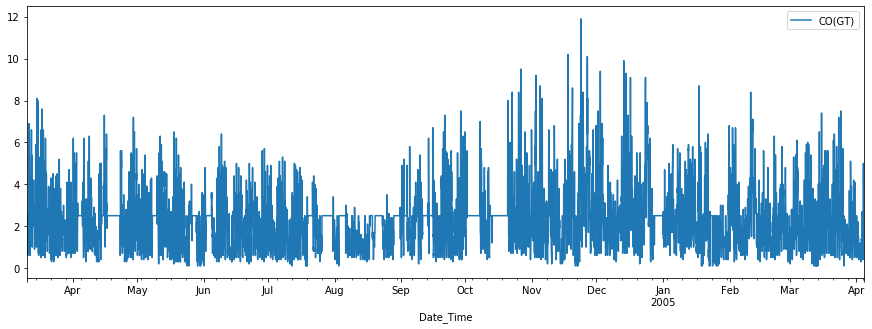

In [9]:
co_data.plot(figsize = (15,5))

In [10]:
train_data = co_data.iloc[:8001]
test_data = co_data.iloc[8000:]

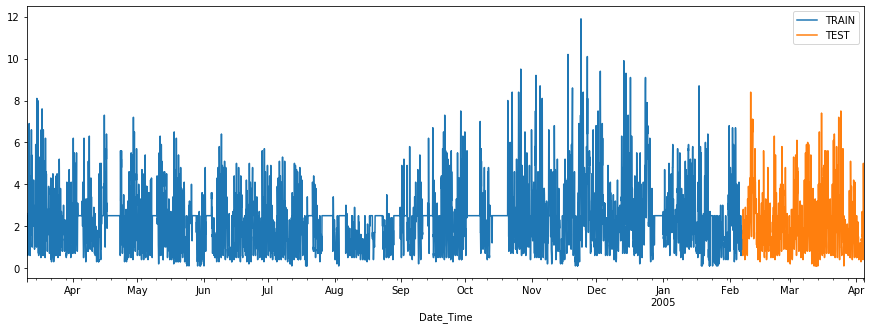

In [11]:
train_data['CO(GT)'].plot(legend = True,label = 'TRAIN', figsize= (15,5))
test_data['CO(GT)'].plot(legend = True,label = 'TEST')

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
model = AR(train_data['CO(GT)'])

In [14]:
AR1fit = model.fit(maxlag = 1 )

In [18]:
AR1fit.params

const        0.433805
L1.CO(GT)    0.807134
dtype: float64

In [22]:
start = len(train_data)
start

8001

In [23]:
end = len(train_data) + len(test_data) -1
end

9357

In [25]:
predictions1 = AR1fit.predict(start = start,end = end)

In [27]:
predictions1 = predictions1.rename('AR(1) Predictios')

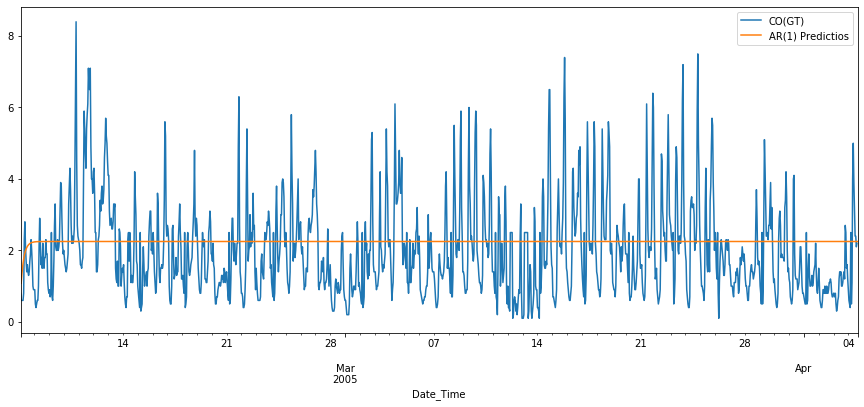

In [32]:
test_data.plot(figsize = (15,6),legend = True)
predictions1.plot(legend = True)

In [33]:
AR2fit = model.fit(maxlag = 2 )

In [34]:
AR2fit.params

const        0.510370
L1.CO(GT)    0.949287
L2.CO(GT)   -0.176131
dtype: float64

In [35]:
predictions2 = AR2fit.predict(start = start,end = end)

In [36]:
predictions2 = predictions2.rename('AR(2) Predictios')

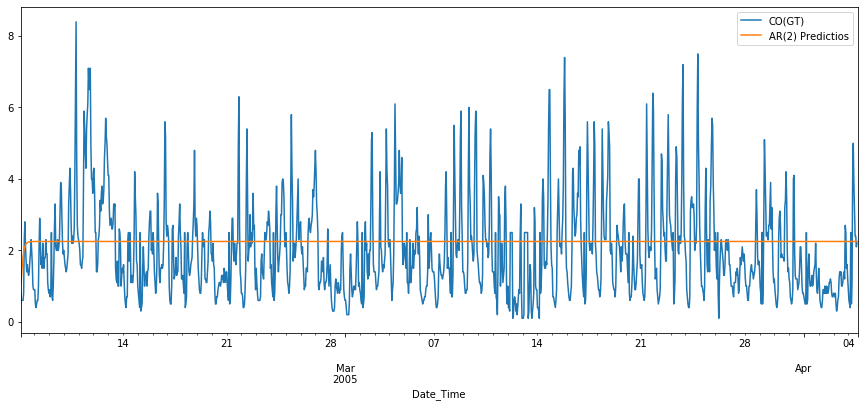

In [39]:
test_data.plot(figsize = (15,6),legend = True)
predictions2.plot(legend = True)

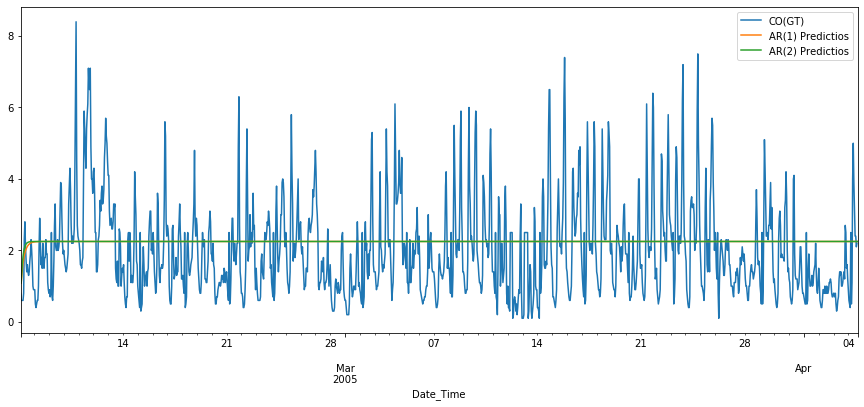

In [40]:
test_data.plot(figsize = (15,6),legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

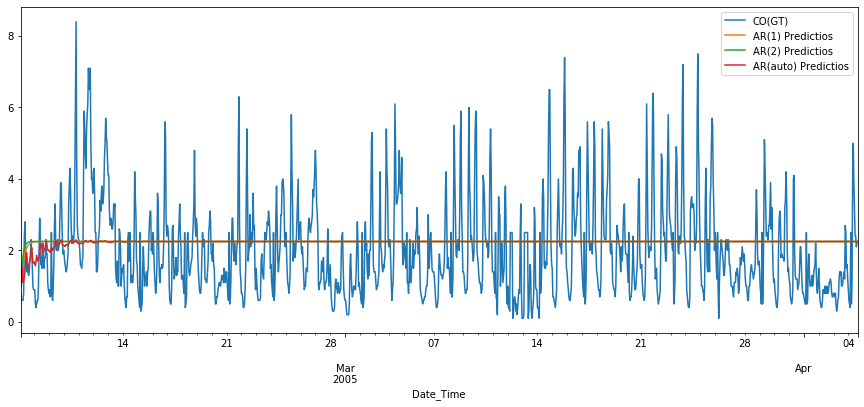

In [44]:
ARfit = model.fit(ic = 't-stat')
predictions = ARfit.predict(start = start,end = end)
predictions = predictions.rename('AR(auto) Predictios')
test_data.plot(figsize = (15,6),legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions.plot(legend = True)

In [46]:
len(ARfit.params)

35